<a href="https://colab.research.google.com/github/Ritesh-Sil/Food-Image-Classification---Using-CNN/blob/Master/Food_Image_Binary_class_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

In [3]:
#!wget means, download the file from the link and store into google colab folder directory
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-08-13 04:55:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   212MB/s    in 0.5s    

2022-08-13 04:55:11 (212 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [4]:
## Inspect the data

In [5]:
!ls pizza_steak

test  train


In [9]:
# !ls pizza_steak/train/steak/ 

In [10]:
import os

In [18]:
for filepath,dirname, filenames in os.walk('pizza_steak'):
  print(f'Under {filepath}  we have {len(filenames)} number of files')


Under pizza_steak  we have 0 number of files
Under pizza_steak/test  we have 0 number of files
Under pizza_steak/test/steak  we have 250 number of files
Under pizza_steak/test/pizza  we have 250 number of files
Under pizza_steak/train  we have 0 number of files
Under pizza_steak/train/steak  we have 750 number of files
Under pizza_steak/train/pizza  we have 750 number of files


In [19]:
 #Alternative way to find the number of images in the file

In [28]:
num_of_files_train = len(os.listdir('pizza_steak/train/steak'))
print(f'Number of files in train directory : {num_of_files_train}')

Number of files in train directory : 750


In [50]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train/')
class_names = np.array([str(item.name) for item in data_dir.glob('*')])

In [51]:
print(class_names)

['steak' 'pizza']


In [30]:
print(data_dir)

/content/pizza_steak/train


In [52]:
for i in data_dir.glob('*'):
  print(i)

pizza_steak/train/steak
pizza_steak/train/pizza


In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

Using ```random.sample(list, number of items to be sampled)```, we can randomly sample the items

In [56]:
random.sample([1,2,4,5,6,7,8,9,0], 1)

[8]

In [59]:
random.sample([1,2,4,5,6,7,8,9,0], 2)

[6, 0]

In [61]:
# os.listdir('pizza_steak/train/steak')

In [146]:
random_img_file_name = random.sample(os.listdir('pizza_steak/train/steak'), 1)
random_img_file_name

['1846706.jpg']

In [74]:
## This is how a computer visualizes the image
img_tensor = mpimg.imread(f'pizza_steak/train/steak/{random_img_file_name[0]}')

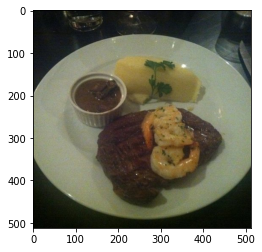

In [75]:
#How to show the image?
# Using the imshow from matplotlib

plt.imshow(img_tensor)

**Task #1** : *Write a function to pick an image randomly from the train folder.* 


1.   Show the class label in title of the image.
2.   Don't show the axis


In [77]:
!pwd

/content


In [78]:
!ls -lrt

total 213964
-rw-r--r-- 1 root root 109540975 Dec  6  2021 pizza_steak.zip.1
-rw-r--r-- 1 root root 109540975 Dec  6  2021 pizza_steak.zip
drwxr-xr-x 1 root root      4096 Aug  3 20:21 sample_data
drwxr-xr-x 4 root root      4096 Aug 13 04:55 pizza_steak


In [79]:
!ls pizza_steak

test  train


In [80]:
os.listdir('/content/pizza_steak/train')

['steak', 'pizza']

In [147]:
base_dir = '/content/pizza_steak/'
train_dir = 'train/'
test_dir = 'test/'
class_names = os.listdir('/content/pizza_steak/train')


def show_random_image(class_name, train_or_test_dir):
  full_path = base_dir+train_or_test_dir+class_name
  print(full_path)
  image_list = os.listdir(full_path)
  random_image  = random.sample(image_list, 1)
  random_img_tensor = mpimg.imread(full_path+'/'+random_image[0])
  plt.imshow(random_img_tensor)
  plt.title(train_or_test_dir+'::'+class_name+'::'+str(random_img_tensor.shape))
  plt.axis(False)
  

/content/pizza_steak/train/steak


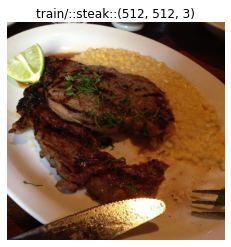

In [148]:
show_random_image(random.sample(class_names,1)[0],train_dir)

In [110]:
random.sample(class_names,1)

['pizza']

In [142]:
tensor = np.array([[[255,100,0],
           [255,100,0],
           [255,100,0]]])

In [143]:
tensor.shape

(1, 3, 3)

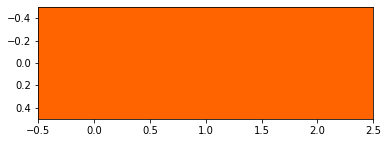

In [144]:
plt.imshow(tensor)

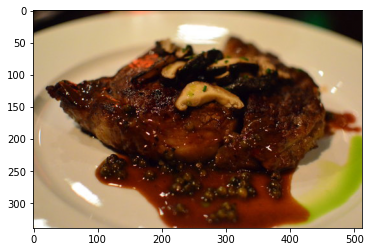

In [153]:
full_path = '/content/pizza_steak/train/steak/1846706.jpg'
img_norm = mpimg.imread(full_path)/255
plt.imshow(img_norm)